In [80]:
import pandas as pd
import numpy as np
import scipy as scp 
import random 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
input_df = pd.read_csv('./CC-Approval-Prediction/label_df.csv')
input_df.shape

(8116, 20)

###### Very highly Imbalanced prolem to model .

1. Good book clients are considered by taking a window of len atleast 30 months history and not having status as '3', '4' and '5'

2. 3.4% of bad clients in the sample.

In [4]:
input_df['label'].value_counts()

good    7838
bad      278
Name: label, dtype: int64

In [5]:
(278/(7838 + 278)) * 100.0

3.4253326761951706

In [6]:
input_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,risk_start_month,label
0,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,39,good
1,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,43,good
2,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0,32,good
3,5008832,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0,35,good
4,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10968,-1620,1,0,0,0,NaN,2.0,45,good


###### Only Occupation is missing. 

1.Instead of dropping the column, lets impute the occupation with a category called missing.

In [7]:
input_df.isna().sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        2549
CNT_FAM_MEMBERS           0
risk_start_month          0
label                     0
dtype: int64

In [8]:
# missing is not givin much info as it is proportionally represented in the label..
input_df[input_df["OCCUPATION_TYPE"].isna()]["label"].value_counts()

good    2455
bad       94
Name: label, dtype: int64

<AxesSubplot:xlabel='OCCUPATION_TYPE'>

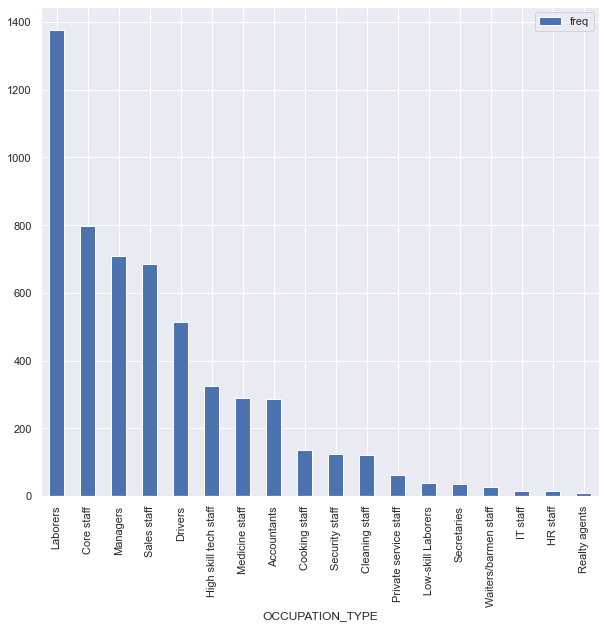

In [9]:
plt_df = input_df['OCCUPATION_TYPE'].value_counts().reset_index()
plt_df.columns = ["OCCUPATION_TYPE", "freq"]
plt_df.plot(x="OCCUPATION_TYPE", y="freq", kind="bar", figsize=(10, 9))

In [10]:
input_df.fillna({"OCCUPATION_TYPE": 'missing'}, inplace=True)

###### Some points to consider based on the describe method..

1. No variablility in FLAG_MOBI, std is zero. (Exclude this column in analysis, no info)

2. DAYS_EMPLOYED, max value is 365243. Looks suspicious need to check for outliers. Based on the data description, positive value signifies unemployment. 

3. 75% of the people dont have a work phone.

4. Max count of children is 14. Looks like a outlier

In [11]:
input_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,risk_start_month
count,8.116000e+03,8116.000000,8.116000e+03,8116.000000,8116.000000,8116.0,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000
mean,5.079139e+06,0.415106,1.872399e+05,-16347.929029,60037.515648,1.0,0.233243,0.305323,0.090192,2.200468,42.165229
std,4.141470e+04,0.753591,1.005039e+05,4051.476065,138653.588108,0.0,0.422922,0.460572,0.286475,0.907886,9.838620
min,5.008811e+06,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,4.000000
25%,5.045829e+06,0.000000,1.215000e+05,-19654.000000,-3453.500000,1.0,0.000000,0.000000,0.000000,2.000000,36.000000
50%,5.069422e+06,0.000000,1.620000e+05,-16053.000000,-1773.500000,1.0,0.000000,0.000000,0.000000,2.000000,41.000000
75%,5.115612e+06,1.000000,2.250000e+05,-12953.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,49.000000
max,5.150475e+06,14.000000,1.575000e+06,-8347.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,61.000000


In [12]:
input_df.drop('FLAG_MOBIL', axis = 1, inplace=True)

In [13]:
(input_df["DAYS_BIRTH"]/-365.0).describe()

count    8116.000000
mean       44.788847
std        11.099934
min        22.868493
25%        35.487671
50%        43.980822
75%        53.846575
max        68.909589
Name: DAYS_BIRTH, dtype: float64

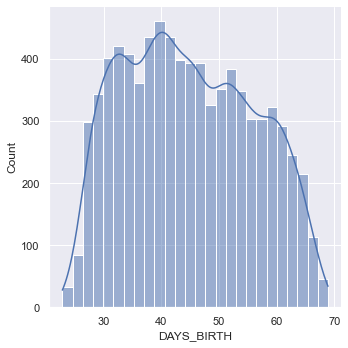

In [14]:
sns.displot(input_df["DAYS_BIRTH"]/-365.0, kde=True)

<AxesSubplot:xlabel='label', ylabel='DAYS_BIRTH'>

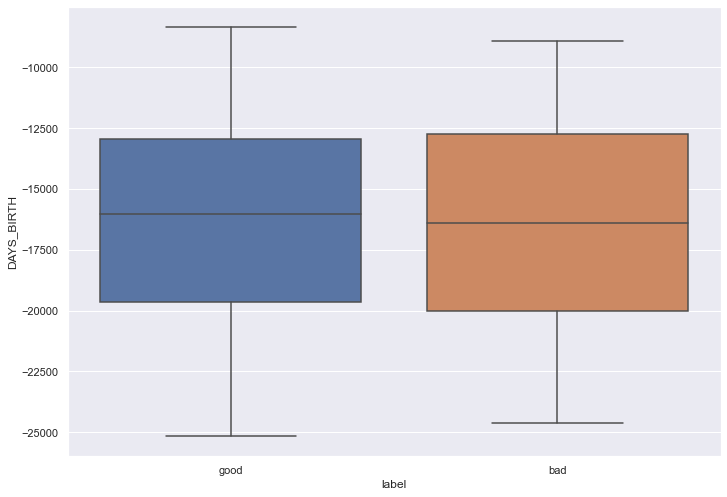

In [15]:
sns.boxplot(x = "label", y="DAYS_BIRTH", data=input_df)

In [16]:
input_df.groupby("label").apply(lambda x: (x["DAYS_BIRTH"]/365.0).median())

label
bad    -44.967123
good   -43.923288
dtype: float64

###### Except some outliers, no relationship is seen between Age & Income 

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='AMT_INCOME_TOTAL'>

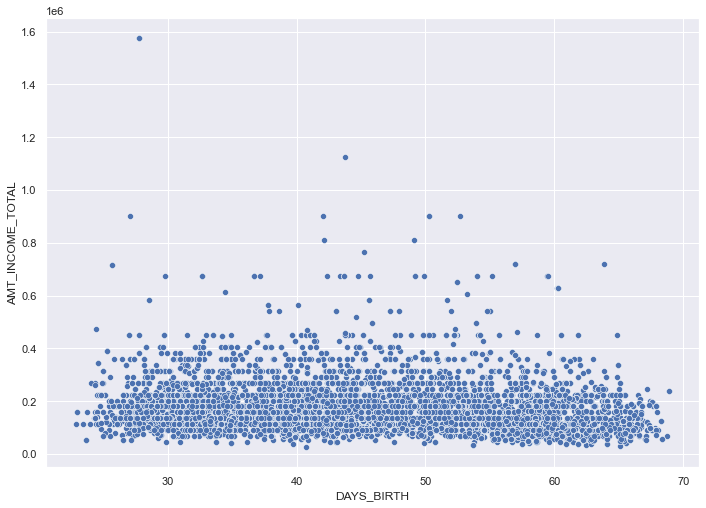

In [17]:
sns.scatterplot(x=input_df["DAYS_BIRTH"]/-365.0, y=input_df['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='label', ylabel='AMT_INCOME_TOTAL'>

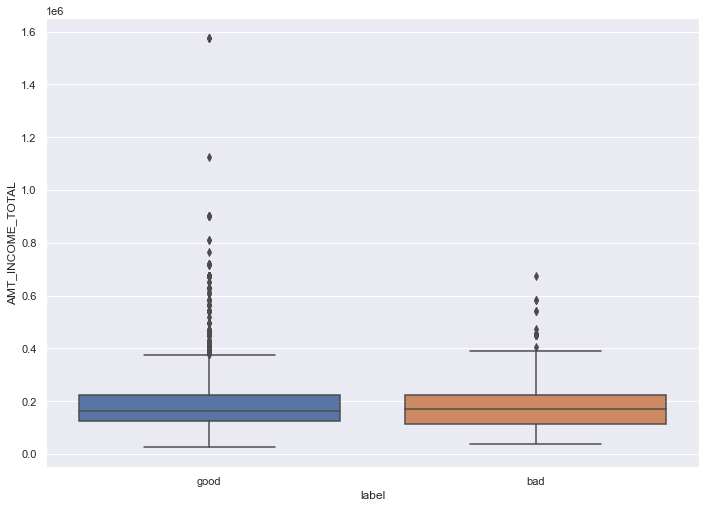

In [18]:
sns.boxplot(x = "label", y="AMT_INCOME_TOTAL", data=input_df)

###### Income is not showing as a differentiating factor 

In [19]:
input_df.groupby('label')["AMT_INCOME_TOTAL"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
bad,278.0,191143.165468,105955.990319,36000.0,112500.0,171000.0,225000.0,675000.0
good,7838.0,187101.501786,100309.406896,27000.0,126000.0,161100.0,225000.0,1575000.0


In [20]:
input_df.groupby('label')["DAYS_BIRTH"].describe()[:]/-365

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
bad,-0.761644,45.144279,-11.898078,67.427397,54.816438,44.967123,34.946575,24.402740
good,-21.473973,44.776240,-11.071172,68.909589,53.786301,43.923288,35.487671,22.868493


###### EDA on days Employed 

1. 1388 people in the sample are unemployed (As the value is +ve and looks like it is imputed with some high value)
   if we are building tree based model, we can leave as it is to differentiate with others.
   
2. Bad accounts of unemployed people are 4.32 % compared to 3.4%.

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

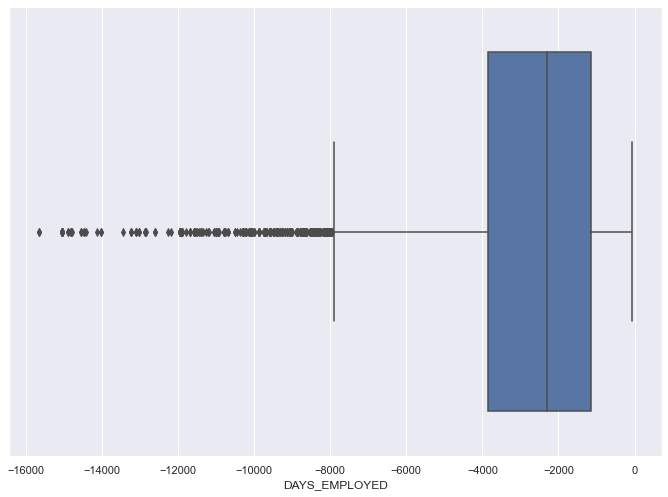

In [21]:
sns.boxplot(x=input_df[input_df['DAYS_EMPLOYED'] <= 0]['DAYS_EMPLOYED'])

###### Days employed looks skewed 

1. Majority of the people fall under 13 years of employment..

positive values:  (1388,)


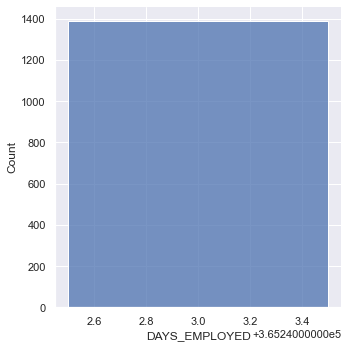

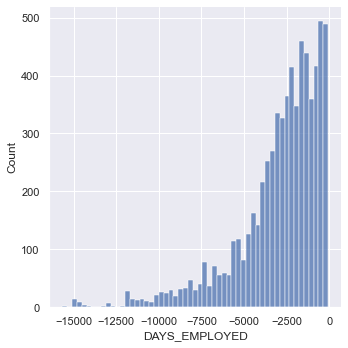

In [22]:
print("positive values: ", input_df[input_df['DAYS_EMPLOYED'] >= 0]['DAYS_EMPLOYED'].shape)
sns.displot(input_df[input_df['DAYS_EMPLOYED'] >= 0]['DAYS_EMPLOYED'])
sns.displot(input_df[input_df['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED']) 

In [23]:
unemployed_df = input_df[input_df['DAYS_EMPLOYED'] >= 0]
unemployed_df["label"].value_counts()

good    1328
bad       60
Name: label, dtype: int64

In [24]:
(60/(1328 + 60)) * 100.0

4.322766570605188

###### Created IS_employed variable

In [25]:
input_df["IS_EMPLOYED"] = input_df["DAYS_EMPLOYED"].apply(lambda x: 0 if x >= 0 else 1)

<AxesSubplot:xlabel='OCCUPATION_TYPE'>

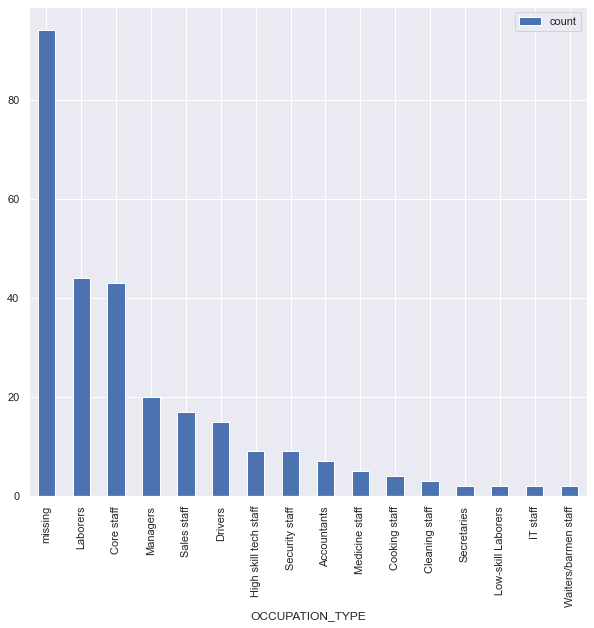

In [26]:
plt_df = input_df[input_df["label"] == 'bad']["OCCUPATION_TYPE"].value_counts().reset_index()
plt_df.columns = ["OCCUPATION_TYPE", 'count']


plt_df.plot(x="OCCUPATION_TYPE", y="count", kind="bar", figsize=(10, 9))

<AxesSubplot:xlabel='OCCUPATION_TYPE'>

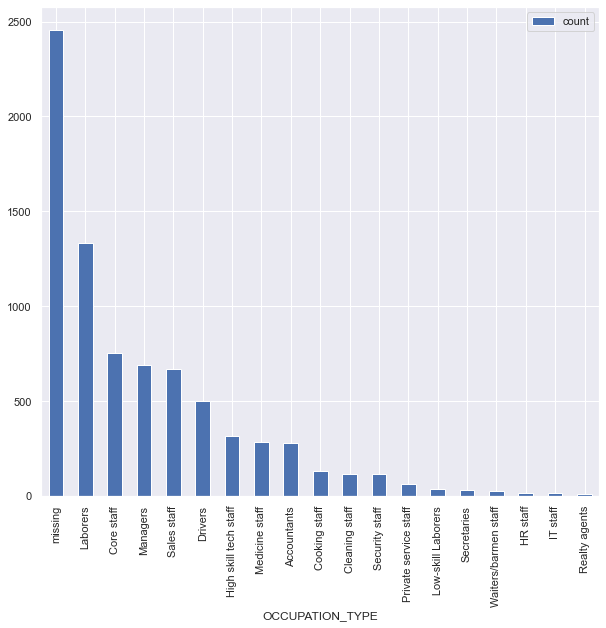

In [27]:
plt_df = input_df[input_df["label"] == 'good']["OCCUPATION_TYPE"].value_counts().reset_index()
plt_df.columns = ["OCCUPATION_TYPE", 'count']


plt_df.plot(x="OCCUPATION_TYPE", y="count", kind="bar", figsize=(10, 9))

###### Outliers are present in both in count of family members as count of children.
###### Can discard these rows, if we want to build linear models. 

###### remove samples where CNT_FAM_MEMBERS > 6. Maximum value is 15

<AxesSubplot:xlabel='label', ylabel='CNT_FAM_MEMBERS'>

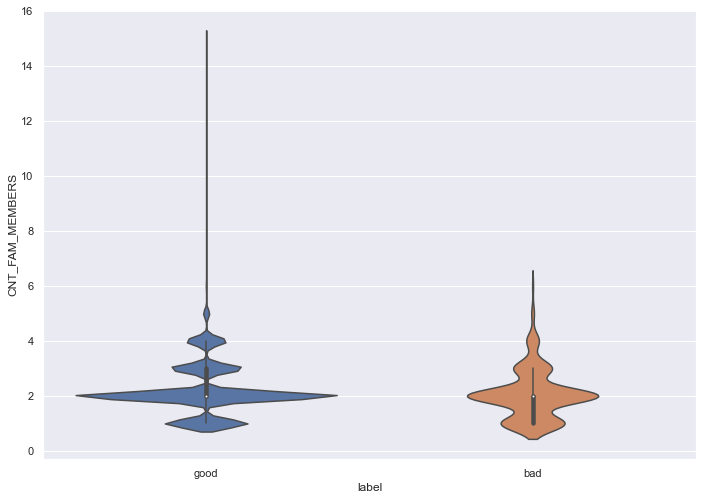

In [28]:
sns.violinplot(x = "label", y="CNT_FAM_MEMBERS", data=input_df)

In [29]:
input_df.groupby('label')['CNT_FAM_MEMBERS'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
bad,278.0,2.046763,0.875647,1.0,1.0,2.0,2.0,6.0
good,7838.0,2.205920,0.908584,1.0,2.0,2.0,3.0,15.0


<AxesSubplot:xlabel='label', ylabel='CNT_CHILDREN'>

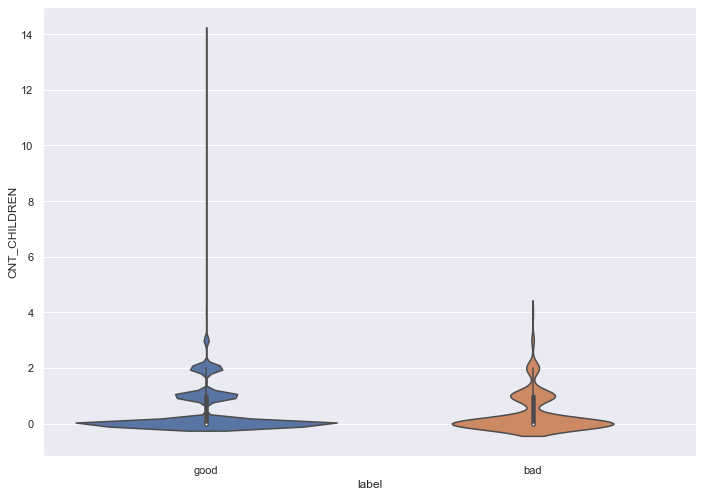

In [30]:
sns.violinplot(x = "label", y="CNT_CHILDREN", data=input_df)

In [31]:
print(np.percentile(input_df['CNT_FAM_MEMBERS'], q=[50, 80, 95, 99, 100]))
print(np.percentile(input_df['CNT_CHILDREN'], q=[50, 80, 95, 99, 100]))

[ 2.  3.  4.  5. 15.]
[ 0.  1.  2.  3. 14.]


In [32]:
input_df[(input_df["CNT_FAM_MEMBERS"] <= 6) & (input_df["CNT_CHILDREN"] <= 4)].reset_index(drop=True, inplace=True)

###### Convert days_to_birth to years age in years for better interpretability
###### convert DAYS_EMPLOYED into employment_in_months and for positive values impute with zero

In [33]:
input_df['age_in_years'] = (-input_df["DAYS_BIRTH"]/365.0)

input_df['employment_in_months'] = (input_df["DAYS_EMPLOYED"]/365.0) * 12.0
input_df['employment_in_months'] = input_df['employment_in_months'].map(lambda x: 0 if x > 0 else -x)

###### Splitting the data 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import auc, f1_score, confusion_matrix, balanced_accuracy_score

In [35]:
numeric_cols = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "age_in_years", \
                "employment_in_months", 'CNT_FAM_MEMBERS']



categorical_cols = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", \
                    "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", \
                   "NAME_HOUSING_TYPE", 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', \
                   "OCCUPATION_TYPE"]

feats = numeric_cols + categorical_cols
label_col = 'label'

print("len of numeric cols: ", len(numeric_cols))
print("len of categorical cols: ", len(categorical_cols))


X_train, X_test, y_train, y_test = train_test_split(input_df[feats], input_df[label_col], \
                                                      stratify=input_df[label_col], test_size=0.1, random_state=99)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, \
                                                      stratify=y_train, test_size=0.1, random_state=99)

print('train label : ', y_train.value_counts())
print()
print('Valid label : ', y_valid.value_counts())
print()
print('test label : ', y_test.value_counts())

# Encode categorical to OHE, SKLEAR ensemble needs the columns to be encoded 
ohe_input_df = pd.get_dummies(input_df[feats], columns=categorical_cols, drop_first=True)

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(ohe_input_df, input_df[label_col], \
                                                    stratify=input_df[label_col], test_size=0.1, random_state=101)

X_train_ohe, X_valid_ohe, y_train_ohe, y_valid_ohe = train_test_split(X_train_ohe, y_train_ohe, \
                                                                      stratify=y_train_ohe, test_size=0.1, random_state=101)

len of numeric cols:  5
len of categorical cols:  11
train label :  good    6348
bad      225
Name: label, dtype: int64

Valid label :  good    706
bad      25
Name: label, dtype: int64

test label :  good    784
bad      28
Name: label, dtype: int64


###### Training gradient Boosted decesion tree

In [36]:
from catboost import CatBoostClassifier, Pool

In [37]:
pool_train_data = Pool(X_train, y_train, cat_features=categorical_cols)
pool_valid_data = Pool(X_valid, y_valid, cat_features=categorical_cols)

#scale_pos_weight=0.2, class_weights=(10, 1), default is 500
model = CatBoostClassifier(verbose=True, use_best_model=True, scale_pos_weight=0.05, iterations= 100)

model.fit(pool_train_data, eval_set=pool_valid_data)
print("get best iteration: ", model.get_best_iteration())

Learning rate set to 0.137372
0:	learn: 0.6789410	test: 0.6820546	best: 0.6820546 (0)	total: 223ms	remaining: 22.1s
1:	learn: 0.6645705	test: 0.6702606	best: 0.6702606 (1)	total: 291ms	remaining: 14.2s
2:	learn: 0.6547744	test: 0.6598461	best: 0.6598461 (2)	total: 342ms	remaining: 11.1s
3:	learn: 0.6437703	test: 0.6504145	best: 0.6504145 (3)	total: 407ms	remaining: 9.77s
4:	learn: 0.6342994	test: 0.6436067	best: 0.6436067 (4)	total: 473ms	remaining: 8.99s
5:	learn: 0.6219627	test: 0.6408895	best: 0.6408895 (5)	total: 533ms	remaining: 8.35s
6:	learn: 0.6137721	test: 0.6347894	best: 0.6347894 (6)	total: 593ms	remaining: 7.88s
7:	learn: 0.6019813	test: 0.6238559	best: 0.6238559 (7)	total: 655ms	remaining: 7.54s
8:	learn: 0.5959876	test: 0.6216298	best: 0.6216298 (8)	total: 720ms	remaining: 7.28s
9:	learn: 0.5869607	test: 0.6173158	best: 0.6173158 (9)	total: 789ms	remaining: 7.1s
10:	learn: 0.5817698	test: 0.6148437	best: 0.6148437 (10)	total: 849ms	remaining: 6.87s
11:	learn: 0.5722120	te

94:	learn: 0.3544993	test: 0.5800359	best: 0.5718716 (86)	total: 9.95s	remaining: 524ms
95:	learn: 0.3523296	test: 0.5814942	best: 0.5718716 (86)	total: 10.1s	remaining: 420ms
96:	learn: 0.3503113	test: 0.5840173	best: 0.5718716 (86)	total: 10.2s	remaining: 315ms
97:	learn: 0.3483955	test: 0.5803888	best: 0.5718716 (86)	total: 10.3s	remaining: 211ms
98:	learn: 0.3474353	test: 0.5785354	best: 0.5718716 (86)	total: 10.5s	remaining: 106ms
99:	learn: 0.3457435	test: 0.5765783	best: 0.5718716 (86)	total: 10.6s	remaining: 0us

bestTest = 0.571871587
bestIteration = 86

Shrink model to first 87 iterations.
get best iteration:  86


In [38]:
predictions = ['good' if val >= 0.5 else 'bad' for val in model.predict_proba(pool_valid_data)[:, 1]]
cf_df = pd.DataFrame(confusion_matrix(y_valid, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

,GT_BAD,GT_GOOD
PREDS_BAD,13,51
PREDS_GOOD,12,655


In [39]:
model.classes_

array(['bad', 'good'], dtype=object)

###### Handling Imbalance problem by applying different sampling techniques

In [40]:
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

###### Perform SMOTE to create synthetic minority samples using KNN and also perform undersampling on Majority class.

###### Applied class weights, to weigh the negative examples more 

In [41]:
cat_feats_mask = [True if col in categorical_cols else False for col in X_train.columns]
smote_over = SMOTENC(categorical_features=cat_feats_mask, sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=0.1)

X_resampled, y_resampled = smote_over.fit_resample(X_train, y_train)
print("SMOTE value_counts: ", y_resampled.value_counts())

X_resampled, y_resampled = under.fit_resample(X_resampled, y_resampled)
print("Undersampling value_counts: ", y_resampled.value_counts())

SMOTE value_counts:  good    6348
bad      317
Name: label, dtype: int64
Undersampling value_counts:  good    3170
bad      317
Name: label, dtype: int64


In [42]:
resampled_df = pd.concat([X_resampled, y_resampled], axis = 1).sample(frac=1)
X_train_resampled, y_train_resampled  = resampled_df[feats], resampled_df[label_col]

In [43]:
pool_train_data = Pool(X_train_resampled, y_train_resampled, cat_features=categorical_cols)
pool_valid_data = Pool(X_valid, y_valid, cat_features=categorical_cols)

#Apply class_weights=(10, 1) to tackle the imbalance problem..
cat_boost_model = CatBoostClassifier(verbose=True, use_best_model=True, class_weights=(10, 1), \
                                     iterations= 500)

cat_boost_model.fit(pool_train_data, eval_set=pool_valid_data)
print("get best iteration: ", cat_boost_model.get_best_iteration())

Learning rate set to 0.058323
0:	learn: 0.6842569	test: 0.6885943	best: 0.6885943 (0)	total: 96.9ms	remaining: 48.4s
1:	learn: 0.6785923	test: 0.6843362	best: 0.6843362 (1)	total: 213ms	remaining: 53s
2:	learn: 0.6740037	test: 0.6812694	best: 0.6812694 (2)	total: 353ms	remaining: 58.4s
3:	learn: 0.6665577	test: 0.6753548	best: 0.6753548 (3)	total: 490ms	remaining: 1m
4:	learn: 0.6620405	test: 0.6722978	best: 0.6722978 (4)	total: 633ms	remaining: 1m 2s
5:	learn: 0.6584806	test: 0.6687229	best: 0.6687229 (5)	total: 770ms	remaining: 1m 3s
6:	learn: 0.6541363	test: 0.6659855	best: 0.6659855 (6)	total: 907ms	remaining: 1m 3s
7:	learn: 0.6499188	test: 0.6636748	best: 0.6636748 (7)	total: 1.02s	remaining: 1m 3s
8:	learn: 0.6474246	test: 0.6618138	best: 0.6618138 (8)	total: 1.16s	remaining: 1m 3s
9:	learn: 0.6432907	test: 0.6605056	best: 0.6605056 (9)	total: 1.3s	remaining: 1m 3s
10:	learn: 0.6397389	test: 0.6564068	best: 0.6564068 (10)	total: 1.44s	remaining: 1m 3s
11:	learn: 0.6361387	test: 

94:	learn: 0.5072607	test: 0.5775289	best: 0.5775289 (94)	total: 10.8s	remaining: 46.1s
95:	learn: 0.5046548	test: 0.5753409	best: 0.5753409 (95)	total: 10.9s	remaining: 46.1s
96:	learn: 0.5040417	test: 0.5750575	best: 0.5750575 (96)	total: 11s	remaining: 45.8s
97:	learn: 0.5040417	test: 0.5750538	best: 0.5750538 (97)	total: 11.1s	remaining: 45.4s
98:	learn: 0.5035327	test: 0.5750133	best: 0.5750133 (98)	total: 11.2s	remaining: 45.3s
99:	learn: 0.5034139	test: 0.5750902	best: 0.5750133 (98)	total: 11.2s	remaining: 45s
100:	learn: 0.5022892	test: 0.5741254	best: 0.5741254 (100)	total: 11.4s	remaining: 44.9s
101:	learn: 0.4996313	test: 0.5735389	best: 0.5735389 (101)	total: 11.5s	remaining: 44.9s
102:	learn: 0.4994735	test: 0.5733387	best: 0.5733387 (102)	total: 11.6s	remaining: 44.8s
103:	learn: 0.4977286	test: 0.5716092	best: 0.5716092 (103)	total: 11.7s	remaining: 44.7s
104:	learn: 0.4972396	test: 0.5709780	best: 0.5709780 (104)	total: 11.8s	remaining: 44.4s
105:	learn: 0.4972133	test

186:	learn: 0.3671158	test: 0.5230570	best: 0.5226136 (185)	total: 21.8s	remaining: 36.5s
187:	learn: 0.3662134	test: 0.5226033	best: 0.5226033 (187)	total: 21.9s	remaining: 36.4s
188:	learn: 0.3643276	test: 0.5218090	best: 0.5218090 (188)	total: 22.1s	remaining: 36.3s
189:	learn: 0.3623146	test: 0.5231072	best: 0.5218090 (188)	total: 22.2s	remaining: 36.2s
190:	learn: 0.3610044	test: 0.5232111	best: 0.5218090 (188)	total: 22.3s	remaining: 36.1s
191:	learn: 0.3604714	test: 0.5231967	best: 0.5218090 (188)	total: 22.5s	remaining: 36.1s
192:	learn: 0.3581102	test: 0.5231265	best: 0.5218090 (188)	total: 22.6s	remaining: 36s
193:	learn: 0.3561943	test: 0.5233771	best: 0.5218090 (188)	total: 22.8s	remaining: 35.9s
194:	learn: 0.3546459	test: 0.5229490	best: 0.5218090 (188)	total: 22.9s	remaining: 35.8s
195:	learn: 0.3532585	test: 0.5206162	best: 0.5206162 (195)	total: 23s	remaining: 35.7s
196:	learn: 0.3505074	test: 0.5179347	best: 0.5179347 (196)	total: 23.2s	remaining: 35.7s
197:	learn: 0.

278:	learn: 0.2549064	test: 0.4822531	best: 0.4816777 (276)	total: 34.2s	remaining: 27.1s
279:	learn: 0.2542323	test: 0.4827654	best: 0.4816777 (276)	total: 34.3s	remaining: 27s
280:	learn: 0.2529188	test: 0.4807917	best: 0.4807917 (280)	total: 34.5s	remaining: 26.9s
281:	learn: 0.2513035	test: 0.4801778	best: 0.4801778 (281)	total: 34.6s	remaining: 26.7s
282:	learn: 0.2505064	test: 0.4806119	best: 0.4801778 (281)	total: 34.7s	remaining: 26.6s
283:	learn: 0.2498751	test: 0.4802705	best: 0.4801778 (281)	total: 34.9s	remaining: 26.5s
284:	learn: 0.2492407	test: 0.4802913	best: 0.4801778 (281)	total: 35s	remaining: 26.4s
285:	learn: 0.2487977	test: 0.4812228	best: 0.4801778 (281)	total: 35.1s	remaining: 26.3s
286:	learn: 0.2483555	test: 0.4807055	best: 0.4801778 (281)	total: 35.3s	remaining: 26.2s
287:	learn: 0.2475250	test: 0.4803081	best: 0.4801778 (281)	total: 35.4s	remaining: 26.1s
288:	learn: 0.2465117	test: 0.4803412	best: 0.4801778 (281)	total: 35.6s	remaining: 26s
289:	learn: 0.24

370:	learn: 0.1878635	test: 0.4789624	best: 0.4701806 (333)	total: 46.7s	remaining: 16.2s
371:	learn: 0.1873314	test: 0.4785985	best: 0.4701806 (333)	total: 46.9s	remaining: 16.1s
372:	learn: 0.1870259	test: 0.4780005	best: 0.4701806 (333)	total: 47s	remaining: 16s
373:	learn: 0.1869642	test: 0.4785500	best: 0.4701806 (333)	total: 47.1s	remaining: 15.9s
374:	learn: 0.1862914	test: 0.4796626	best: 0.4701806 (333)	total: 47.2s	remaining: 15.7s
375:	learn: 0.1858620	test: 0.4793227	best: 0.4701806 (333)	total: 47.4s	remaining: 15.6s
376:	learn: 0.1857215	test: 0.4794700	best: 0.4701806 (333)	total: 47.5s	remaining: 15.5s
377:	learn: 0.1853298	test: 0.4793263	best: 0.4701806 (333)	total: 47.7s	remaining: 15.4s
378:	learn: 0.1848824	test: 0.4800602	best: 0.4701806 (333)	total: 47.8s	remaining: 15.3s
379:	learn: 0.1846554	test: 0.4798292	best: 0.4701806 (333)	total: 47.9s	remaining: 15.1s
380:	learn: 0.1838698	test: 0.4799737	best: 0.4701806 (333)	total: 48s	remaining: 15s
381:	learn: 0.1832

462:	learn: 0.1484270	test: 0.4866926	best: 0.4701806 (333)	total: 58.8s	remaining: 4.7s
463:	learn: 0.1479671	test: 0.4878724	best: 0.4701806 (333)	total: 58.9s	remaining: 4.57s
464:	learn: 0.1474258	test: 0.4886169	best: 0.4701806 (333)	total: 59s	remaining: 4.44s
465:	learn: 0.1470635	test: 0.4888108	best: 0.4701806 (333)	total: 59.2s	remaining: 4.32s
466:	learn: 0.1464113	test: 0.4890666	best: 0.4701806 (333)	total: 59.3s	remaining: 4.19s
467:	learn: 0.1462773	test: 0.4892810	best: 0.4701806 (333)	total: 59.4s	remaining: 4.06s
468:	learn: 0.1462721	test: 0.4892764	best: 0.4701806 (333)	total: 59.6s	remaining: 3.94s
469:	learn: 0.1458381	test: 0.4885807	best: 0.4701806 (333)	total: 59.7s	remaining: 3.81s
470:	learn: 0.1455261	test: 0.4893243	best: 0.4701806 (333)	total: 59.8s	remaining: 3.68s
471:	learn: 0.1451457	test: 0.4893211	best: 0.4701806 (333)	total: 60s	remaining: 3.56s
472:	learn: 0.1444865	test: 0.4896692	best: 0.4701806 (333)	total: 1m	remaining: 3.43s
473:	learn: 0.1442

In [44]:
predictions = ['good' if val >= 0.5 else 'bad' for val in cat_boost_model.predict_proba(pool_valid_data)[:, 1]]

# average recall on two classes
print(balanced_accuracy_score(y_valid, predictions))

cf_df = pd.DataFrame(confusion_matrix(y_valid, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

0.7024645892351274


,GT_BAD,GT_GOOD
PREDS_BAD,12,53
PREDS_GOOD,13,653


###### Ensemble of samplers 

1. Balanced bagging classifier will grow classifier (Tree) based on balanced bootstraped samples

2. Also try Ensemble like Adaboost classifier and Random forest classifier combined with different balanced booststrap techniques..

3. These are Ensembles combined with Random undersampling technique, to fit each base estimator in the ensemble

In [45]:
from imblearn.ensemble import BalancedBaggingClassifier

In [46]:

# Make positive samples five times the negative classes in every boot strap sample 
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                n_estimators = 200,
                                sampling_strategy=0.3,
                                replacement=False,
                                random_state=101)


bbc.fit(X_train_ohe, y_train_ohe)
predictions = bbc.predict(X_valid_ohe)
b_acc_score = balanced_accuracy_score(y_valid_ohe, predictions)
print("Balanced accuracy score: ", b_acc_score)
cf_df = pd.DataFrame(confusion_matrix(y_valid_ohe, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

Balanced accuracy score:  0.7507932011331444


,GT_BAD,GT_GOOD
PREDS_BAD,13,13
PREDS_GOOD,12,693


###### Use Adaboost classifier as the weak learner 

In [47]:
from imblearn.ensemble import EasyEnsembleClassifier

# Default estimator is AdaBoostClassifier
adaboost_estimator = AdaBoostClassifier(n_estimators=50)

eec = EasyEnsembleClassifier(random_state=0, base_estimator = adaboost_estimator, n_estimators = 50, \
                             sampling_strategy=0.3, \
                             replacement=False)

eec.fit(X_train_ohe, y_train_ohe)

predictions = eec.predict(X_valid_ohe)

b_acc_score = balanced_accuracy_score(y_valid_ohe, predictions)
print("Balanced accuracy score: ", b_acc_score)
cf_df = pd.DataFrame(confusion_matrix(y_valid_ohe, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

Balanced accuracy score:  0.5286685552407933


,GT_BAD,GT_GOOD
PREDS_BAD,2,16
PREDS_GOOD,23,690


In [48]:
from imblearn.ensemble import BalancedRandomForestClassifier



brf = BalancedRandomForestClassifier(n_estimators=100, \
                                     random_state=0, sampling_strategy=0.2)

brf.fit(X_train_ohe, y_train_ohe)


#predict probabilities
predictions = ['good' if val >= 0.75 else 'bad' for val in brf.predict_proba(X_valid_ohe)[:, 1]]

b_acc_score = balanced_accuracy_score(y_valid_ohe, predictions)
print("Balanced accuracy score: ", b_acc_score)
cf_df = pd.DataFrame(confusion_matrix(y_valid_ohe, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

Balanced accuracy score:  0.7546742209631727


,GT_BAD,GT_GOOD
PREDS_BAD,15,64
PREDS_GOOD,10,642


In [49]:
from imblearn.ensemble import RUSBoostClassifier

In [50]:
rusboost = RUSBoostClassifier(n_estimators=250, algorithm='SAMME.R',
                              random_state=0, base_estimator=DecisionTreeClassifier(max_depth=2), \
                              sampling_strategy=0.1)

rusboost.fit(X_train_ohe, y_train_ohe)
predictions = rusboost.predict(X_valid_ohe)

#predict probabilities
predictions = ['good' if val >= 0.5 else 'bad' for val in rusboost.predict_proba(X_valid_ohe)[:, 1]]

b_acc_score = balanced_accuracy_score(y_valid_ohe, predictions)
print("Balanced accuracy score: ", b_acc_score)
cf_df = pd.DataFrame(confusion_matrix(y_valid_ohe, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

Balanced accuracy score:  0.6743342776203967


,GT_BAD,GT_GOOD
PREDS_BAD,9,8
PREDS_GOOD,16,698


###### Tweaking the Probability threshold on the balancedRandomForestClassifier earlier on validation set gave us the balanced accuracy score of 0.75.

###### For the same threshold 0.75, Test set is giving Balanced accuracy as 0.77

###### Below is the confusion matrix & balanced accuracy on the test set.

In [51]:
#predict probabilities on Test set

predictions = ['good' if val >= 0.75 else 'bad' for val in brf.predict_proba(X_test_ohe)[:, 1]]

b_acc_score = balanced_accuracy_score(y_test_ohe, predictions)
print("Balanced accuracy score: ", b_acc_score)

cf_df = pd.DataFrame(confusion_matrix(y_test_ohe, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

Balanced accuracy score:  0.7786989795918368


,GT_BAD,GT_GOOD
PREDS_BAD,18,67
PREDS_GOOD,10,717


Can try some other techniques and also we can choose the best hyperparameters either through Grid serach or Bayesian search. 

But after certain extent, we need to collect more samples in order to dela with this kind of Imabalance..

###### Below predictions are using Cat boost classifier

In [52]:
pool_test_data = Pool(X_test, y_test, cat_features=categorical_cols)

predictions = ['good' if val >= 0.5 else 'bad' for val in cat_boost_model.predict_proba(pool_test_data)[:, 1]]

# average recall on two classes
print(balanced_accuracy_score(y_test, predictions))

cf_df = pd.DataFrame(confusion_matrix(y_test, predictions).T, columns=["GT_BAD", "GT_GOOD"], \
                     index = ["PREDS_BAD", "PREDS_GOOD"])
cf_df

0.7181122448979591


,GT_BAD,GT_GOOD
PREDS_BAD,15,78
PREDS_GOOD,13,706


###### Model analysis and exaplainabilty based on Balanced Random forest classifier

1. Based on the feature importances below following variables seems to have a very high influence on the model predictions

age_in_years, AMT_INCOME_TOTAL, employment_in_months, CNT_FAM_MEMBERS, FLAG_OWN_REALTY_Y

In [53]:
feat_imp_df = pd.DataFrame(brf.feature_importances_, index=X_valid_ohe.columns, columns=["feat_imporatnces"])
feat_imp_df.sort_values(by='feat_imporatnces', ascending=False, inplace=True)

In [54]:
feat_imp_df.head(15)

,feat_imporatnces
age_in_years,0.190619
AMT_INCOME_TOTAL,0.150961
employment_in_months,0.141706
CNT_FAM_MEMBERS,0.039243
FLAG_OWN_REALTY_Y,0.032841
CODE_GENDER_M,0.028203
FLAG_OWN_CAR_Y,0.027590
FLAG_PHONE_1,0.027469
CNT_CHILDREN,0.025387
NAME_INCOME_TYPE_Working,0.020763


In [55]:
(feat_imp_df["feat_imporatnces"] * 100.0)

age_in_years                                         19.061918
AMT_INCOME_TOTAL                                     15.096082
employment_in_months                                 14.170578
CNT_FAM_MEMBERS                                       3.924317
FLAG_OWN_REALTY_Y                                     3.284102
CODE_GENDER_M                                         2.820347
FLAG_OWN_CAR_Y                                        2.758980
FLAG_PHONE_1                                          2.746920
CNT_CHILDREN                                          2.538679
NAME_INCOME_TYPE_Working                              2.076304
FLAG_WORK_PHONE_1                                     2.061042
NAME_EDUCATION_TYPE_Secondary / secondary special     1.955456
NAME_EDUCATION_TYPE_Higher education                  1.843938
OCCUPATION_TYPE_Core staff                            1.781233
NAME_FAMILY_STATUS_Single / not married               1.753916
NAME_FAMILY_STATUS_Married                            1

In [56]:
import shap

In [69]:
explainer = shap.Explainer(brf)
shap_values = explainer(X_test_ohe)

In [115]:
idx_map_list = list(zip(range(len(y_test_ohe)), y_test_ohe.values))
neg_idx_list = []
pos_idx_list = []

for idx, val in idx_map_list:
    if val == "good":
        pos_idx_list.append(idx)
    else:
        neg_idx_list.append(idx)

print("random_bad_idx: ", random.choice(neg_idx_list))
print("random_good_idx: ", random.choice(pos_idx_list))

random_bad_idx:  704
random_good_idx:  593


###### Random example labelled as risky (Bad).

Employment in months (32), Occupation type cooking staff (1), Amount income total (90000) and age in years (52 nearly) are driving the record to label as bad...

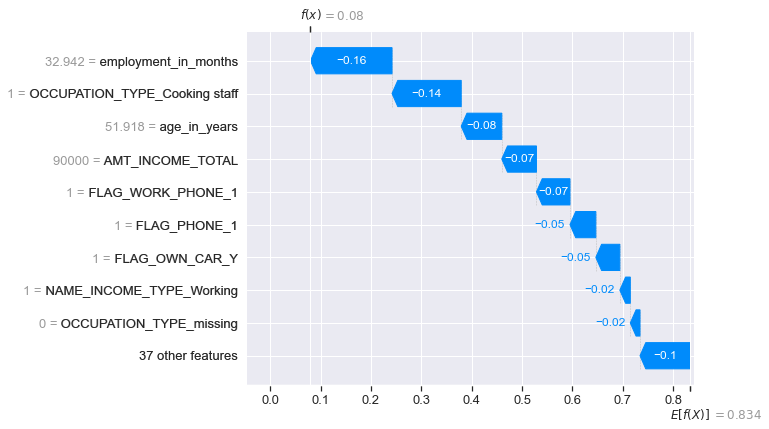

In [116]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[704, :, 1])

###### Random example labelled as good.

###### Employment in months (155 nearly, 12 years), Age (40 years),  Name housing type with Parents (1) and income type not pensioner are driving the record to be less risky (good client)

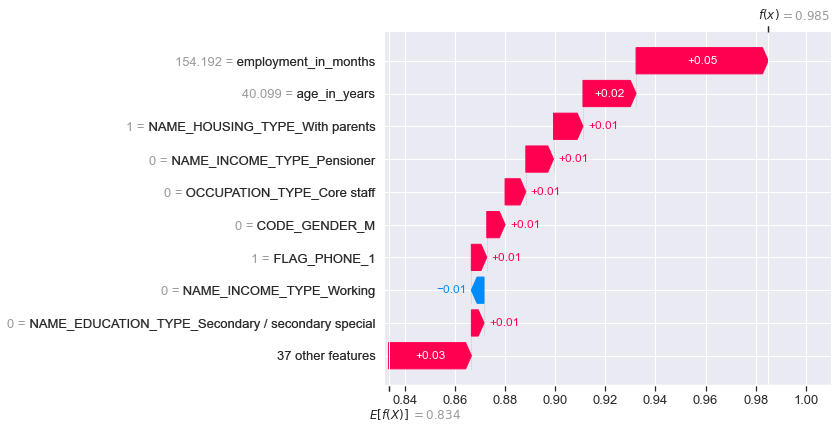

In [117]:
shap.plots.waterfall(shap_values[593, :, 1])

###### Some things which we can infer based on the below shap values for all the samples.

1. Low value of "employment in months" drives the model to classify a sample as risky. 

2. "Age in years" is mixed. Age in years is also significant but dependent on some other features

3. Gender 'Male' shown to be riskier compared to 'Female'

4. If Name_income_type is "Pensioner", it can drive the model to classify a sample as risky.

5. If a person owns any real property, model considers the sample to be less riskier.

6. If a person owns car, model considers the sample to be less riskier.

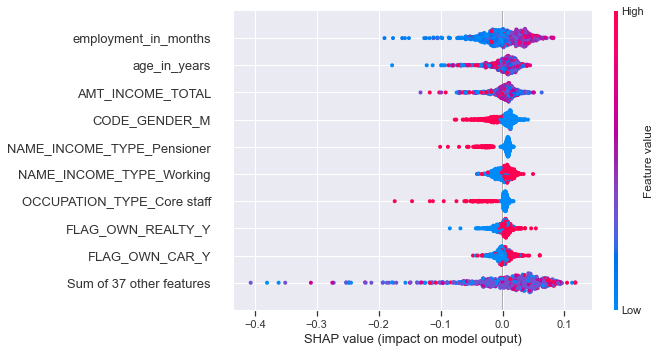

In [119]:
shap.plots.beeswarm(shap_values[:, :, 1])